#### - Sobhan Moradian Daghigh
#### 
#### - 1/20/2022
#### 
#### - PR - EX03 - Q6 - All Parts

In [1]:
import pandas as pd
from PIL import Image
import numpy as np
import cv2
from skimage.util import view_as_blocks
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import glob
from PIL import Image
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

### Using the glob for loading the datasets

In [2]:
def load_datas(folder_name):
    
    images = glob.glob('./inputs/P6/LFW/{}/*.jpg'.format(folder_name))

    x_dataset = []
    y_dataset = []
    images = glob.glob('./inputs/P6/LFW/{}/*.jpg'.format(folder_name))
    for image in images:
        if folder_name == 'train':
            label = image.split('\\')[1][:-7]
        else:
            label = image.split('\\')[1][:-4]

        img = np.array(Image.open(image)).reshape((1, 4800))

        x_dataset.append(img[0])
        y_dataset.append(label)               
            
    return x_dataset, y_dataset

In [3]:
x_train, y_train = load_datas('train')
x_test, y_test = load_datas('test')

### Part A.

In [4]:
def eigenfaces_train(trainset ,v):
    pca = PCA(n_components=v)
    pca.fit_transform(trainset)
    mean = pd.DataFrame(trainset).mean()
    return pca.components_, mean

In [5]:
# eigenfaces_train(x_train, 50)

In [6]:
W, mu = eigenfaces_train(x_train, 50)

In [7]:
W.shape

(50, 4800)

In [8]:
mu.shape

(4800,)

### Part B.

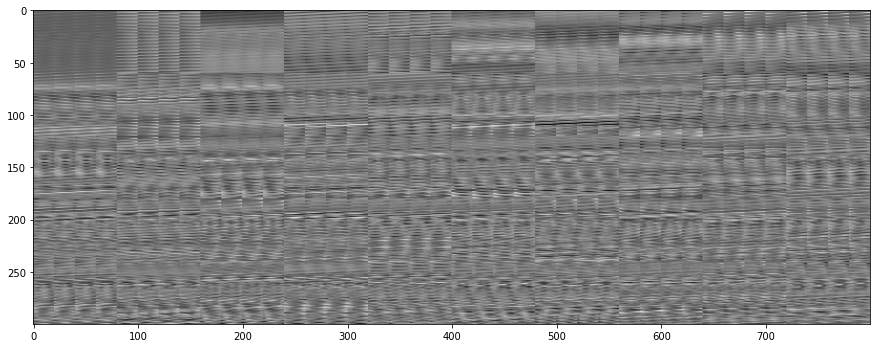

In [9]:
plt.figure(figsize=(15,15))
shapei, shapej = 60, 80
blank = np.zeros((300, 800))
indi, indj = 0, 0

for vec in W:
    vec = vec.reshape(shapei, shapej)
    if blank.shape[1] == indj:
        indi += shapei 
        indj = 0

    blank[indi: indi + shapei, indj: indj + shapej] = vec
    indj += shapej
        
plt.imshow(blank, cmap='gray')
plt.show()

### Part C.

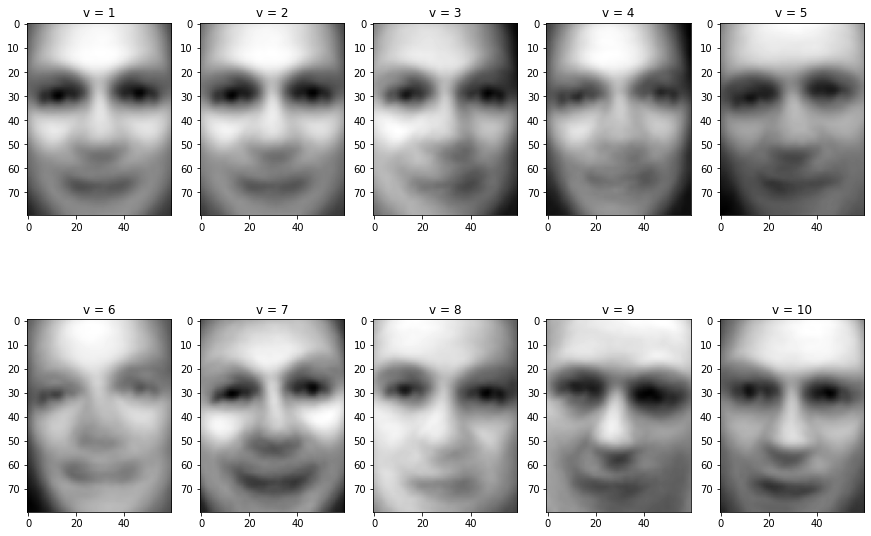

In [10]:
v = range(1, 11)
n_samples = 10
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
samples = random.choices(range(len(x_train)), k=n_samples)
    
for i, ax in enumerate(fig.axes):
    
    # Compress
    pca = PCA(n_components=v[i])
    reduced = pca.fit_transform(x_train)

    # Reconstruct
    reconstructed = pca.inverse_transform(reduced)
    
    recons = np.array(reconstructed[samples[i]]).reshape(80, 60)
    
    ax.imshow(recons, cmap='gray')
    ax.set_title('v = {}'.format(v[i]))
plt.show()

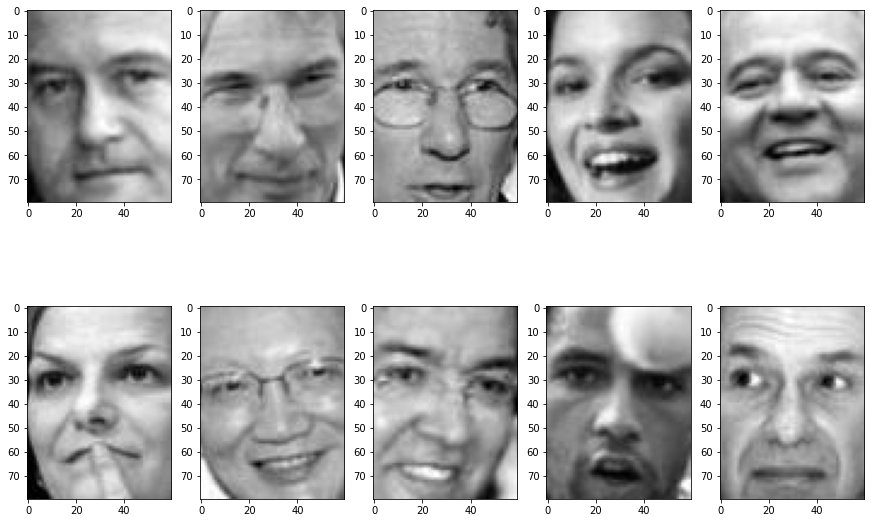

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(15, 10))
    
for i, ax in enumerate(fig.axes):
    org = np.array(x_train[samples[i]]).reshape(80, 60)
    ax.imshow(org, cmap='gray')
plt.show()

### Part D.

In [39]:
def eigenfaces_test(trainset, trainlabels, testset, y_test, W, mu, v):
    pca = PCA(n_components = v)
    pca.fit(trainset)
    
    train_pca = pca.transform(trainset)
    test_pca = pca.transform(testset)
    
    knn = KNeighborsClassifier(n_neighbors=1, metric='euclidean', weights='distance')
    knn.fit(train_pca, trainlabels)
    
    acc = knn.score(test_pca, y_test)

    return acc

In [40]:
# test_samples = []
# test_labels = []
# randint = np.random.randint(73, size=40)
# [test_samples.append(x_test[x]) for x in randint]
# [test_labels.append(y_test[x]) for x in randint]
# pass

In [45]:
error_rates = []
for v in range(1, 50):
    W, mu = eigenfaces_train(x_train, v)
    acc = eigenfaces_test(x_train, y_train, x_test, y_test, W, mu, v)
    error_rates.append(1 - acc)
    print("Error rate of test dataset: {}".format(1 - acc))

Error rate of test dataset: 0.9863013698630136
Error rate of test dataset: 1.0
Error rate of test dataset: 1.0
Error rate of test dataset: 0.9178082191780822
Error rate of test dataset: 0.9178082191780822
Error rate of test dataset: 0.9178082191780822
Error rate of test dataset: 0.9178082191780822
Error rate of test dataset: 0.9178082191780822
Error rate of test dataset: 0.9178082191780822
Error rate of test dataset: 0.904109589041096
Error rate of test dataset: 0.8767123287671232
Error rate of test dataset: 0.8493150684931507
Error rate of test dataset: 0.863013698630137
Error rate of test dataset: 0.863013698630137
Error rate of test dataset: 0.8493150684931507
Error rate of test dataset: 0.8356164383561644
Error rate of test dataset: 0.8493150684931507
Error rate of test dataset: 0.8493150684931507
Error rate of test dataset: 0.8493150684931507
Error rate of test dataset: 0.8356164383561644
Error rate of test dataset: 0.821917808219178
Error rate of test dataset: 0.8356164383561644


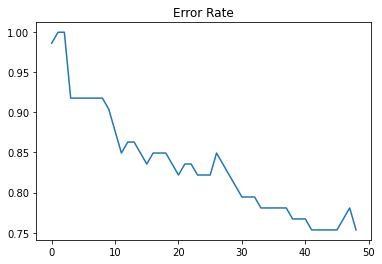

In [49]:
plt.plot(error_rates)
plt.title('Error Rate')
plt.show()